In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

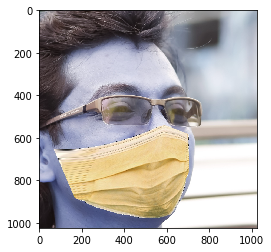

In [2]:
img_array = cv2.imread("Dataset/With_Face_Mask/00009_Mask.jpg")
plt.imshow(img_array)
#the image will be in BGR format
#cv2 basically follows BGR image color format

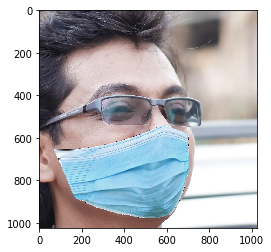

In [3]:
plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
#Converting the bgr format to RGB format

In [4]:
img_array.shape
# it is 1024*1024 image with RGB color format

(1024, 1024, 3)

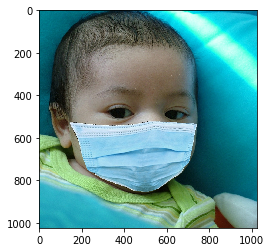

In [5]:
DATADIR = "Dataset/"
#traiing_dataset
categories = ["With_Face_Mask","Without_Mask"]#list of classee

for cat in categories:
    path = os.path.join(DATADIR,cat)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))#,cv2.IMREAD_GRAYSCALE)
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

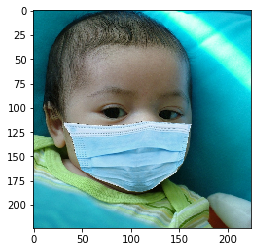

In [6]:
IMG_SIZE =224
#size must be 224*224

new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [7]:
new_array.shape

(224, 224, 3)

In [8]:
training_data = []
#data

def create_training_data():
    for cat in categories:
        path = os.path.join(DATADIR,cat)
        class_num = categories.index(cat) #0,1 lables
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
            
create_training_data()

In [9]:
len(training_data)
#total images stored

1950

In [10]:
import random

random.shuffle(training_data)

In [11]:
for sample in training_data:
    print(sample[1])
#all the images shuffeled 

0
0
1
0
1
0
1
0
1
1
0
1
0
1
0
0
0
1
0
1
0
0
1
0
0
0
1
1
1
0
1
0
1
1
0
0
1
1
0
0
0
0
0
0
0
0
1
0
0
1
0
1
1
1
0
0
1
1
1
1
1
0
1
1
0
1
0
1
1
1
1
0
1
1
1
0
1
0
0
1
1
1
1
0
0
0
0
1
1
0
1
0
1
1
1
0
1
0
0
0
1
0
0
1
0
1
0
1
0
0
1
1
1
1
1
1
1
0
1
0
0
1
0
1
1
1
0
0
0
1
1
1
1
0
0
0
0
1
1
0
0
1
0
1
0
1
1
1
0
0
1
1
0
0
1
1
1
1
0
0
1
0
0
0
1
0
1
0
1
0
0
0
0
0
0
1
1
1
1
0
0
1
1
0
1
0
1
1
0
1
0
1
0
1
0
1
1
0
0
0
0
1
0
0
1
1
0
1
1
1
0
1
0
1
1
1
0
1
0
0
0
0
0
1
1
1
1
0
1
1
1
1
0
1
0
0
1
0
0
1
0
0
1
0
1
0
0
0
0
1
0
0
1
1
0
1
0
1
1
1
0
0
1
0
0
1
0
0
0
0
1
1
1
1
0
1
0
1
1
0
0
1
0
1
1
1
1
0
0
0
1
1
0
0
1
0
0
1
0
0
0
1
1
0
1
1
0
1
0
0
1
1
0
1
0
1
0
1
1
0
0
0
0
1
0
1
0
1
1
1
1
1
1
0
0
1
0
1
1
0
1
1
1
0
0
1
0
0
0
0
1
1
0
1
0
0
0
1
0
1
1
0
0
0
1
1
1
0
0
0
0
1
1
1
1
0
0
0
0
0
0
1
1
0
1
0
0
0
0
0
1
1
0
0
1
0
1
1
0
0
0
1
1
1
1
1
0
0
0
1
0
1
1
0
1
1
0
1
0
0
1
0
0
1
0
0
0
1
1
1
0
1
1
1
1
1
0
1
1
0
0
1
1
0
0
1
1
1
1
0
1
0
1
1
1
1
0
0
0
0
1
1
0
1
0
0
1
0
0
1
1
1
1
0
0
1
0
1
1
1
1
1
0
0
1
0
0
1
0
1
0
1
0
1
0
0
0
0
1
1


In [12]:
X = []  #data
y = []  #label

for features,label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)


In [13]:
X.shape
#all the images loaded into numpy array

(1950, 224, 224, 3)

In [14]:
#NORMALIZING THE DATA
X = X/255.0;

In [15]:
y[0]

0

In [16]:
Y = np.array(y)

In [17]:
import pickle
#for saving the data
#it takes care the reading and scaling and make it easy
pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [2]:
import pickle
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in  = open("y.pickle","rb")
y = pickle.load(pickle_in)

#deep learning model for training - Transfer Learning

In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [19]:
model = tf.keras.applications.mobilenet.MobileNet() 
#pre_trained model

#image classifiers 

In [20]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [21]:
#transfer Learning


In [22]:
base_input = model.layers[0].input

In [23]:
base_output = model.layers[-4].output

In [24]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer) #0,1
final_ouput = layers.Activation('sigmoid')(final_output)

In [25]:
new_model = keras.Model(inputs = base_input, outputs= final_output)

In [26]:
new_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

In [27]:
#setting for binary classification

In [28]:
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics= ["accuracy"])

In [29]:
new_model.fit(X,Y,batch_size=5, epochs=10, validation_split=0.1)

Epoch 1/10
351/351 [==============================] - 235s 664ms/step - loss: 1.6526 - accuracy: 0.8802 - val_loss: 0.1582 - val_accuracy: 0.9897
Epoch 2/10
351/351 [==============================] - 232s 660ms/step - loss: 0.7817 - accuracy: 0.9478 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
351/351 [==============================] - 232s 662ms/step - loss: 0.2005 - accuracy: 0.9869 - val_loss: 1.4615 - val_accuracy: 0.8923
Epoch 4/10
351/351 [==============================] - 228s 651ms/step - loss: 1.4345 - accuracy: 0.9021 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
351/351 [==============================] - 233s 663ms/step - loss: 5.1305 - accuracy: 0.6574 - val_loss: 1.3488 - val_accuracy: 0.9077
Epoch 6/10
351/351 [==============================] - 230s 655ms/step - loss: 1.0648 - accuracy: 0.9268 - val_loss: 0.1564 - val_accuracy: 0.9897
Epoch 7/10
351/351 [==============================] - 232s 662ms/step - loss: 0.4186 - accuracy: 0.9716 - val_loss: 

In [ ]:
#new_model.fit(X,Y, batch_size=2, epochs=20, validation_split=.1)

#new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
#new_model.fit(X,Y,batch_size=1,epochs=5, validation_split=.1)

In [ ]:
"""X = pickle. load(open("X.pickle","rb"))
y = pickle.load(open("y.pickle","rb"))

#normalising the data
#X= X/255.0

model = Sequential()
model.add(Conv2D(64,(3,3),input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
 
model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])
model.fit(X,y, batch_size=10, epochs=10, validation_split=.1)
"""

In [30]:
new_model.save('my_model2.h5')

In [31]:
new_model = tf.keras.models.load_model('my_model2.h5')

In [32]:
frame = cv2.imread('00011_Mask.jpg')

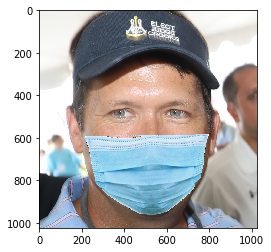

In [33]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [34]:
final_image = cv2.resize(frame,(224,224))
final_image = np.expand_dims(final_image,axis=0)
final_image = final_image/255.0

In [35]:
predictions = new_model.predict(final_image)
predictions

array([[-54.22457]], dtype=float32)

In [36]:
frame = cv2.imread('girl2.jpg')

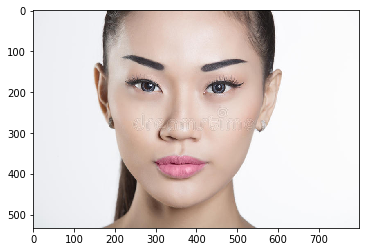

In [37]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [38]:
faceCascade =cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [39]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [40]:
gray.shape

(533, 800)

In [41]:
faces = faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x,y),(x+w,y+h), (255,0,0),2)
    faces = faceCascade.detectMultiScale(roi_gray)
    if len(faces) == 0 :
        print("Face Not Detected")
    else:
        for(ex,ey,ew,eh) in faces:
            face_roi= roi_color[ey:ey+eh, ex:ex +ew]

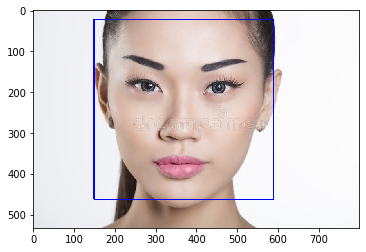

In [42]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

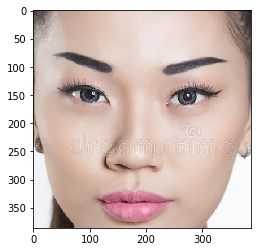

In [43]:
plt.imshow(cv2.cvtColor(face_roi,cv2.COLOR_BGR2RGB))

In [44]:
final_image = cv2.resize(frame,(224,224))
final_image = np.expand_dims(final_image,axis=0)
final_image = final_image/255.0

In [45]:
predictions = new_model.predict(final_image)
predictions

array([[8.995189]], dtype=float32)

In [ ]:
"""import cv2

path = "haarcascade_frontalface_default.xml"
font_scale =1.5
font = cv2.FONT_HERSHEY_PLAIN

rectangle_bgr = (255,255,255)

img = np.zeros((500,500))

text = "Some text in a box"

(text_width,text_height) = cv2.getTextSize(text,font,fontScale = font_scale, thickness=1)[0]
text_offset_x = 10
text_offset_y =img.shape[0]-25
box_coords = ((text_offset_x,text_offset_y), (text_offset_x + text_width+2, text_offset_y-text_height-2))
cv2.rectangle(img, box_coords[0], box_coords[1], rectangle_bgr, cv2.FILLED)
cv2.putText(img, text,(text_offset_x, text_offset_y), font, fontScale = font_scale, color =(0,0,0), thickness=1)
              
cap= cv2.VideoCapture(0)
#if not cap.isOpened():
#    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
"""
cap = cv2.VideoCapture(0)
fourcc = cv2.VideoWriter_fourcc(*'XVID') 
out = cv2.VideoWriter('./outputs/output1.avi', -1, 20.0, (640, 480)) 
fps = 25"""
    
while True:
    ret,frame = cap.read()
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x,y),(x+w,y+h), (255,0,0),2)
        faces = faceCascade.detectMultiScale(roi_gray)
        if len(faces) == 0 :
            print("Face Not Detected")
        else:
            for(ex,ey,ew,eh) in faces:
                face_roi= roi_color[ey:ey+eh, ex:ex +ew]
                
    
    final_image = cv2.resize(frame,(224,224))
    final_image = np.expand_dims(final_image,axis=0)
    final_image = final_image/255.0
    
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    
    predictions= new_model.predict(final_image)
    
    font_scale =1.5
    font = cv2.FONT_HERSHEY_PLAIN
    
    if(predictions<0):
        status ="No Mask"
        
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame,(x1,x1), (x1+w1,y1+h1), (0,0,0),-1)
        cv2.putText(frame, status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))               
    else:
        status ="Face Mask"
        
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame,(x1,x1), (x1+w1,y1+h1), (0,0,0),-1)
        cv2.putText(frame, status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,255,0),2)
        cv2.putText(frame,status,(100,150),font,3,(0,255,0),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0))
     
                      
    cv2.imshow('Face Mask Detection',frame)
    if(cv2.waitKey(2) & 0xFF ==ord('q')):
        break
                      
cap.release()
cv2.destroyAllWindows"""

In [47]:
import cv2

path = "haarcascade_frontalface_default.xml"
font_scale =1.5
font = cv2.FONT_HERSHEY_PLAIN

rectangle_bgr = (255,255,255)

img = np.zeros((500,500))

text = "Some text in a box"

(text_width,text_height) = cv2.getTextSize(text,font,fontScale = font_scale, thickness=1)[0]
text_offset_x = 10
text_offset_y =img.shape[0]-25
box_coords = ((text_offset_x,text_offset_y), (text_offset_x + text_width+2, text_offset_y-text_height-2))
cv2.rectangle(img, box_coords[0], box_coords[1], rectangle_bgr, cv2.FILLED)
cv2.putText(img, text,(text_offset_x, text_offset_y), font, fontScale = font_scale, color =(0,0,0), thickness=1)
              
cap= cv2.VideoCapture(0)
#if not cap.isOpened():
#    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

    
while True:
    ret,frame = cap.read()
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x,y),(x+w,y+h), (255,0,0),2)
        faces = faceCascade.detectMultiScale(roi_gray)
        if len(faces) == 0 :
            print("Face Not Detected")
        else:
            for(ex,ey,ew,eh) in faces:
                face_roi= roi_color[ey:ey+eh, ex:ex +ew]
                
    
        final_image = cv2.resize(frame,(224,224))
        final_image = np.expand_dims(final_image,axis=0)
        final_image = final_image/255.0

        font = cv2.FONT_HERSHEY_SIMPLEX


        predictions= new_model.predict(final_image)

        font_scale =1.5
        font = cv2.FONT_HERSHEY_PLAIN

        if(predictions>0):
            status ="No Mask"

            x1,y1,w1,h1 = 0,0,175,75
            cv2.rectangle(frame,(x1,x1), (x1+w1,y1+h1), (0,0,0),-1)
            cv2.putText(frame, status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
            cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
            cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))               
        else:
            status ="Face Mask"

            x1,y1,w1,h1 = 0,0,175,75
            cv2.rectangle(frame,(x1,x1), (x1+w1,y1+h1), (0,0,0),-1)
            cv2.putText(frame, status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,255,0),2)
            cv2.putText(frame,status,(100,150),font,3,(0,255,0),2,cv2.LINE_4)
            cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0))

                      
    cv2.imshow('Face Mask Detection',frame)
    if(cv2.waitKey(2) & 0xFF ==ord('q')):
        break
                      
cap.release()
cv2.destroyAllWindows

Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not D

Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not Detected
Face Not D

KeyboardInterrupt: 

In [ ]:
#with beep sound
import winsound
frequency =2500
duration = 1000


import cv2

path = "haarcascade_frontalface_default.xml"
font_scale =1.5
font = cv2.FONT_HERSHEY_PLAIN

rectangle_bgr = (255,255,255)

img = np.zeros((500,500))

text = "Some text in a box"

(text_width,text_height) = cv2.getTextSize(text,font,fontScale = font_scale, thickness=1)[0]
text_offset_x = 10
text_offset_y =img.shape[0]-25
box_coords = ((text_offset_x,text_offset_y), (text_offset_x + text_width+2, text_offset_y-text_height-2))
cv2.rectangle(img, box_coords[0], box_coords[1], rectangle_bgr, cv2.FILLED)
cv2.putText(img, text,(text_offset_x, text_offset_y), font, fontScale = font_scale, color =(0,0,0), thickness=1)
              
cap= cv2.VideoCapture(0)
#if not cap.isOpened():
#    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

    
while True:
    ret,frame = cap.read()
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x,y),(x+w,y+h), (255,0,0),2)
        faces = faceCascade.detectMultiScale(roi_gray)
        if len(faces) == 0 :
            print("Face Not Detected")
        else:
            for(ex,ey,ew,eh) in faces:
                face_roi= roi_color[ey:ey+eh, ex:ex +ew]
                
    
        final_image = cv2.resize(frame,(224,224))
        final_image = np.expand_dims(final_image,axis=0)
        final_image = final_image/255.0

        font = cv2.FONT_HERSHEY_SIMPLEX


        predictions= new_model.predict(final_image)

        font_scale =1.5
        font = cv2.FONT_HERSHEY_PLAIN

        if(predictions<0):
            status ="No Face-Mask"

            x1,y1,w1,h1 = 0,0,175,75
            cv2.rectangle(frame,(x1,x1), (x1+w1,y1+h1), (0,0,0),-1)
            cv2.putText(frame, status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
            cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
            cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
            winsound.Beep(frequency, duration)
        else:
            status ="Face-Mask Detected"

            x1,y1,w1,h1 = 0,0,175,75
            cv2.rectangle(frame,(x1,x1), (x1+w1,y1+h1), (0,0,0),-1)
            cv2.putText(frame, status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,255,0),2)
            cv2.putText(frame,status,(100,150),font,3,(0,255,0),2,cv2.LINE_4)
            cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0))

                      
    cv2.imshow('Face Mask Detection',frame)
    if(cv2.waitKey(2) & 0xFF ==ord('q')):
        break
                      
cap.release()
cv2.destroyAllWindows

In [ ]:
"""def predicition():
    img = 'girl2.jpg'
    img = final_image.load_img(img, target_size=(150, 150))
    img = final_image.img_to_array(img)
    img = img/255
    
    prediction = model.predict_classes(img.reshape(1,150,150,3))
    for i in prediction:
        if(i==1):
            return('With Mask',(0,255,0))
        else:
            return('Without Mask',(0,0,255))"""

In [ ]:
"""import cv2
from PIL import Image
import time

face_cascade =cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
cap = cv2.VideoCapture(0)
fourcc = cv2.VideoWriter_fourcc(*'XVID') 
out = cv2.VideoWriter('./outputs/output1.avi', -1, 20.0, (640, 480)) 
fps = 25
while True:
    ret, frame = cap.read()
    if ret==True:
        frame_bgr = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
        face_location = face_cascade.detectMultiScale(frame_bgr,scaleFactor = 1.3,minNeighbors = 4)
        time.sleep(1/fps)
        if(face_location!=[]):
            for x,y,w,h in face_location:

                roi = frame[y: y+h, x: x+w]
                roi_img = Image.fromarray(roi, 'RGB')
                roi_img.save('face.jpg')
                result,color = predicition()

                if(result=='With Mask'):
                    cv2.putText(frame, result, (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (255, 255, 255), 2)
                    cv2.rectangle(frame, (x,y),(x+w,y+h), color, 2)     
                else:
                    cv2.putText(frame, result, (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (255, 255, 255), 2)
                    cv2.rectangle(frame, (x,y),(x+w,y+h), color, 2)
                        
        cv2.imshow("Frame", frame)
        out.write(frame)  
        if cv2.waitKey(1) == ord('q'):
            break
    else:
        break
cap.release()
cv2.destroyAllWindows()"""